# 002 - Exploratory Data Analysis of Candidates

The libraries necessary for the correct operation of the code are imported.

In [1]:
import os
import json
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Setting the environment

In [2]:
try:
    os.chdir("../../Workshop_001")
except FileNotFoundError:
    print("""
        FileNotFoundError - Puede que el directorio no exista o no estas ubicad@ en la ruta especificada.
        """)
os.chdir("..")
print(os.getcwd())

c:\Users\natym\Desktop


### Create connection to the database

In [3]:
with open("Workshop_001/credentials.json", "r", encoding = "utf-8") as f:
    credentials = json.load(f)

db_host = credentials["db_host"]
db_name = credentials["db_name"]
db_user = credentials["db_user"]
db_password = credentials["db_password"]

engine = create_engine(f"postgresql://{db_user}:{db_password}@{db_host}:5432/{db_name}")

### Loading data

Data is brought in for further analysis

In [4]:
query = "SELECT * FROM candidates_raw_data;"
candidates_df = pd.read_sql(query, engine)
candidates_df.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,26/02/2021,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,9/09/2021,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,14/04/2020,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,1/10/2020,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,20/05/2020,Myanmar,13,Mid-Level,Social Media Community Management,9,7


# Dataset Information

Data information is displayed, including column names and data type.

In [5]:
candidates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


In [6]:
candidates_df.shape

(50000, 10)

The presence of null data is checked, in this case no null data were found.

In [7]:
candidates_df.isnull().sum()

First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64

The presence of duplicate values is also checked, and in this case, at first glance, no duplicate values were found.

In [8]:
candidates_df.duplicated().sum()

np.int64(0)

To further review the unique values were also checked. In this part inconsistencies were found. 

It can be observed that although the emails are supposed to be unique, there are some emails that could be repeated, since the total number of rows in the table is 50000 and the emails do not comply with this amount. This may be because the data were randomly generated.  

In [11]:
candidates_df.nunique()

First Name                    3007
Last Name                      474
Email                        49833
Application Date              1646
Country                        244
YOE                             31
Seniority                        7
Technology                      24
Code Challenge Score            11
Technical Interview Score       11
dtype: int64

In [12]:
repeated_emails = candidates_df['Email'].value_counts()
repeated_emails = repeated_emails[repeated_emails > 1]
print(repeated_emails)

Email
marianne31@yahoo.com        3
fern70@gmail.com            3
isaiah24@yahoo.com          2
grady85@gmail.com           2
kelton91@hotmail.com        2
                           ..
marjolaine91@hotmail.com    2
jazmin54@gmail.com          2
reyna2@hotmail.com          2
kasandra68@hotmail.com      2
easter75@gmail.com          2
Name: count, Length: 165, dtype: int64


## Transformations

### Changing columns name to lower case

For better data management the column names were changed to lower case separated by underscore. 

In [13]:
renamed_columns = {
    'First Name': 'first_name',
    'Last Name': 'last_name',
    'Email': 'email',
    'Application Date': 'application_date',
    'Country': 'country',
    'YOE': 'yoe',
    'Seniority': 'seniority',
    'Technology': 'technology',
    'Code Challenge Score': 'code_challenge_score',
    'Technical Interview Score': 'technical_interview_score'
}

candidates_df = candidates_df.rename(columns=renamed_columns)

### Change the type of the date

To work better in operations with the date is important to change to datetime.

In [14]:
candidates_df['application_date'] = pd.to_datetime(candidates_df['application_date'])
candidates_df.dtypes

C:\Users\natym\AppData\Local\Temp\ipykernel_9532\2449633209.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  candidates_df['application_date'] = pd.to_datetime(candidates_df['application_date'])


first_name                           object
last_name                            object
email                                object
application_date             datetime64[ns]
country                              object
yoe                                   int64
seniority                            object
technology                           object
code_challenge_score                  int64
technical_interview_score             int64
dtype: object

# Analysis of variables

A summary of the statistics of the dataset is shown in a general way, applied to the numerical variables.

In [15]:
candidates_df.describe()

,application_date,yoe,code_challenge_score,technical_interview_score
count,50000,50000.000000,50000.000000,50000.000000
mean,2020-04-03 23:04:14.592000,15.286980,4.996400,5.003880
min,2018-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2019-02-17 00:00:00,8.000000,2.000000,2.000000
50%,2020-04-06 00:00:00,15.000000,5.000000,5.000000
75%,2021-05-21 00:00:00,23.000000,8.000000,8.000000
max,2022-07-04 00:00:00,30.000000,10.000000,10.000000
std,NaN,8.830652,3.166896,3.165082


A summary of the statistics of the dataset shown in a general way, applied to categorical variables.

In [16]:
candidates_df.describe(include='object')

,first_name,last_name,email,country,seniority,technology
count,50000,50000,50000,50000,50000,50000
unique,3007,474,49833,244,7,24
top,Sarai,Murazik,marianne31@yahoo.com,Malawi,Intern,Game Development
freq,33,138,3,242,7255,3818


# Exploratory Data Analysis

In this section, the EDA graphs are plotted to review general patterns in the data. The distribution and variability of the data are checked. 

## Identify outliers

In [17]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numeric_columns = ['yoe', 'code_challenge_score', 'technical_interview_score']
for col in numeric_columns:
    outliers = detect_outliers(candidates_df, col)
    print(f"Outliers en {col}: {len(outliers)}")

Outliers en yoe: 0
Outliers en code_challenge_score: 0
Outliers en technical_interview_score: 0


## Code Challenge Score and Technical Interview Score Disribution

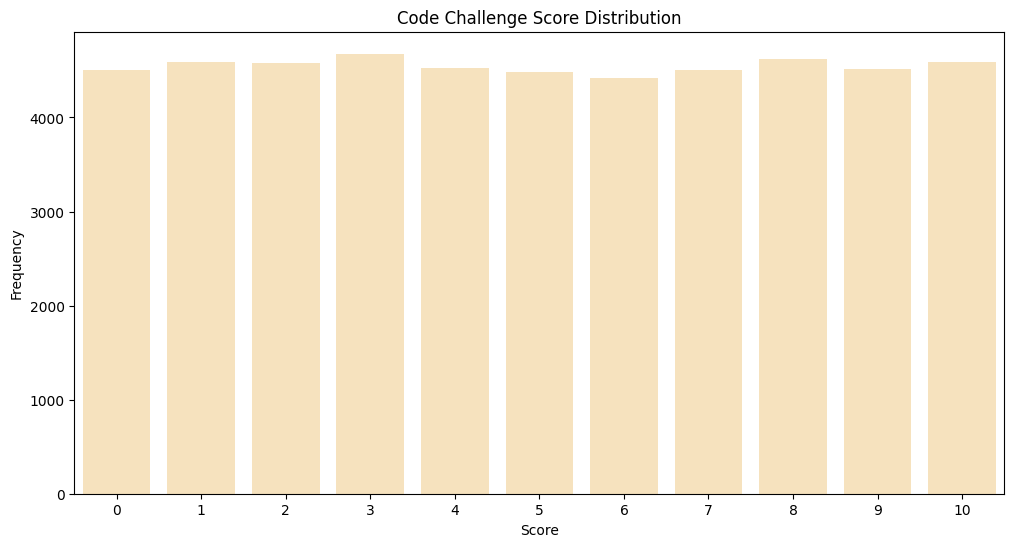

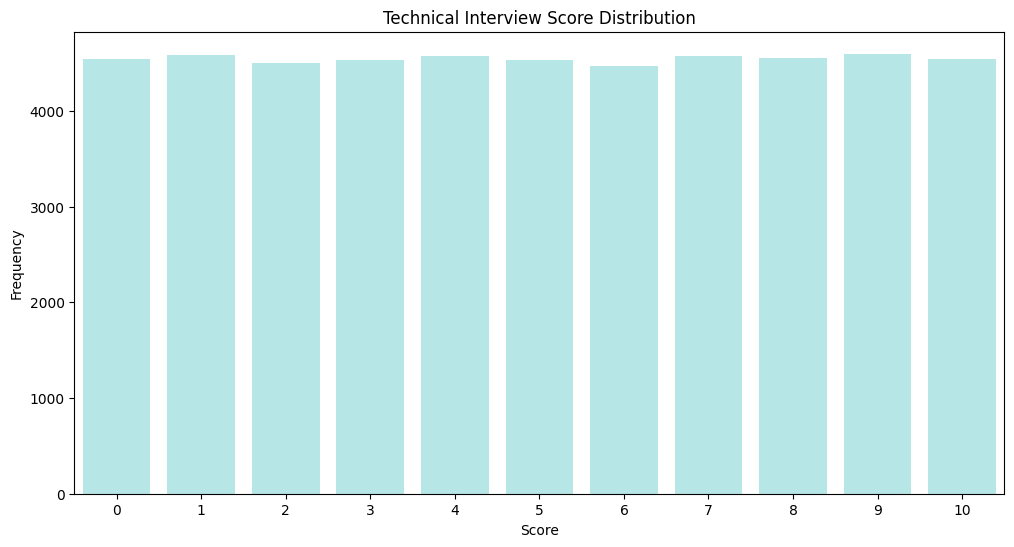

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x=candidates_df['code_challenge_score'].value_counts().index, y=candidates_df['code_challenge_score'].value_counts().values, color='moccasin')
plt.title('Code Challenge Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=candidates_df['technical_interview_score'].value_counts().index, y=candidates_df['technical_interview_score'].value_counts().values, color='paleturquoise')
plt.title('Technical Interview Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

## Seniority distribution

C:\Users\natym\AppData\Local\Temp\ipykernel_9532\1073279554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='seniority', data=candidates_df, order=candidates_df['seniority'].value_counts().index, palette='plasma')


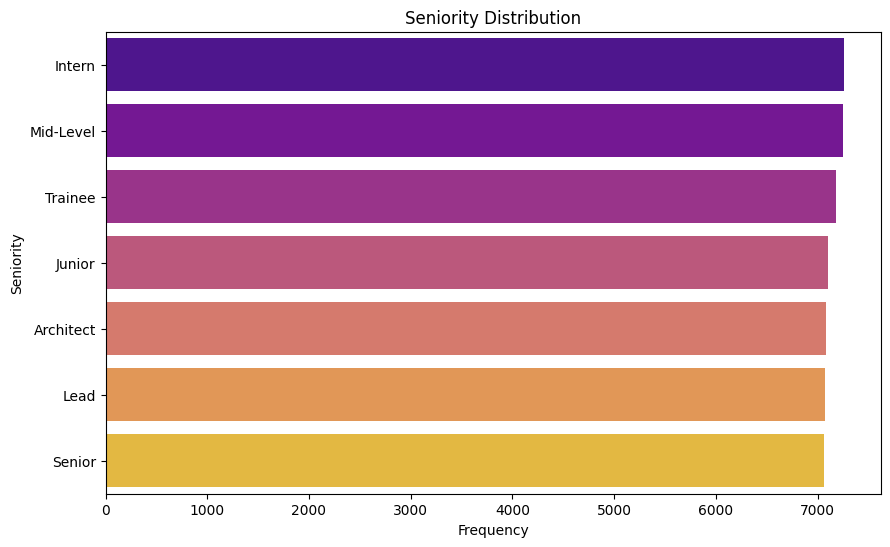

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(y='seniority', data=candidates_df, order=candidates_df['seniority'].value_counts().index, palette='plasma')
plt.title('Seniority Distribution')
plt.xlabel('Frequency')
plt.ylabel('Seniority')
plt.show()

## Technology distribution

C:\Users\natym\AppData\Local\Temp\ipykernel_9532\494324115.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='technology', data=candidates_df, order=candidates_df['technology'].value_counts().index, palette='Paired')


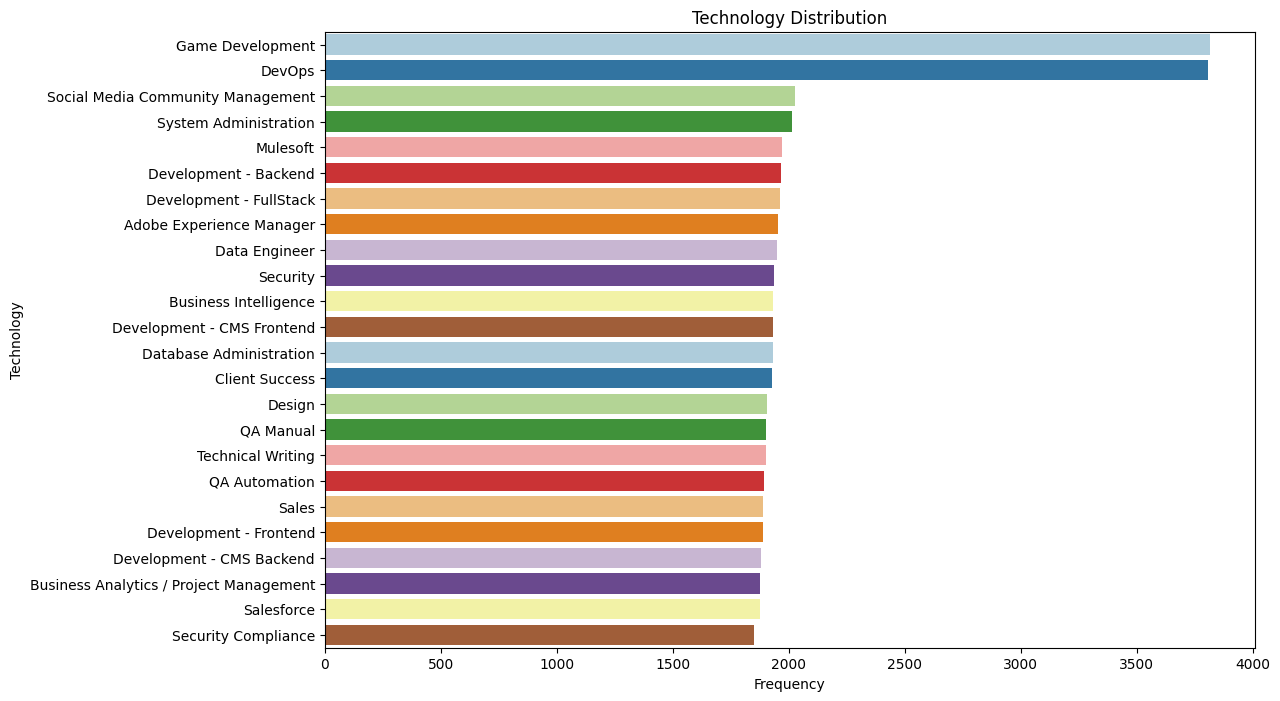

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(y='technology', data=candidates_df, order=candidates_df['technology'].value_counts().index, palette='Paired')
plt.title('Technology Distribution')
plt.xlabel('Frequency')
plt.ylabel('Technology')
plt.show()

## Correlation between numeric variables

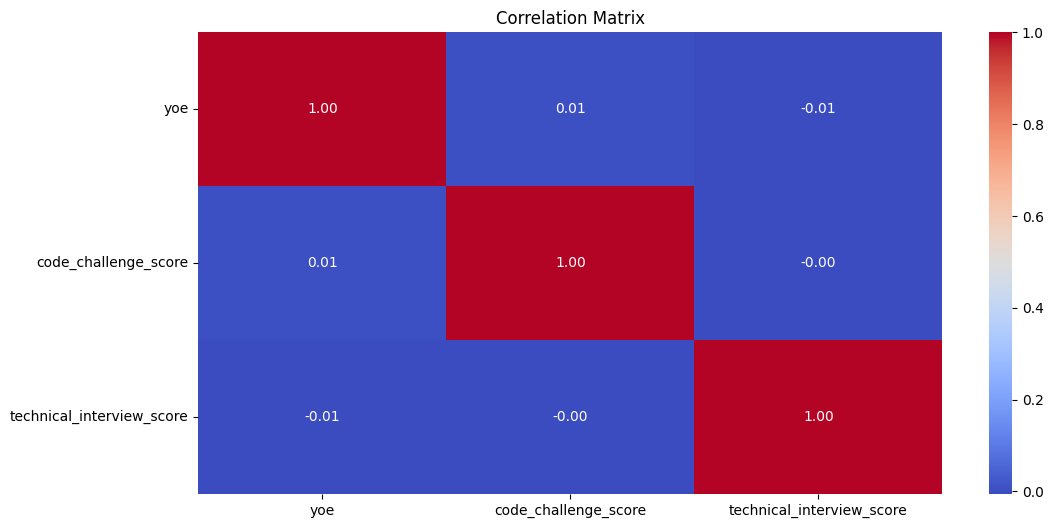

In [21]:
numeric_columns = candidates_df.select_dtypes(include=[np.number]).columns
corr_matrix = candidates_df[numeric_columns].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Applications per year

It can be seen that in 2022 there was a considerable reduction in the number of applications, due to the fact that the data is not taking the entire 2022, it is taking up to July. 

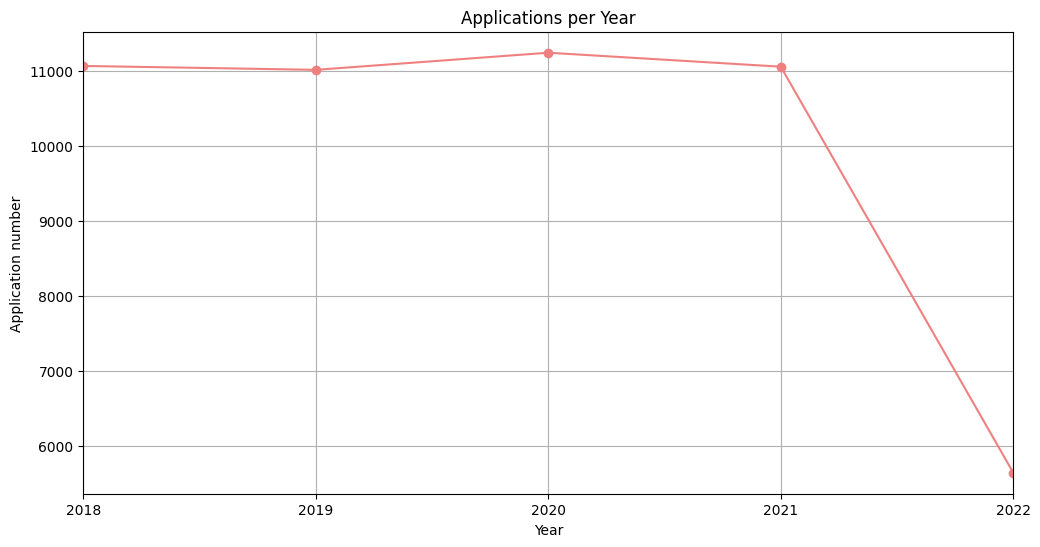

In [22]:
candidates_df['application_year'] = candidates_df['application_date'].dt.to_period('Y')

applications_per_year = candidates_df['application_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
applications_per_year.plot(kind='line', marker='o', color='lightcoral')
plt.title('Applications per Year')
plt.xlabel('Year')
plt.ylabel('Application number')
plt.grid(True)
plt.show()

## Distribution of Code Challenge and Technical Interview Score by Seniority

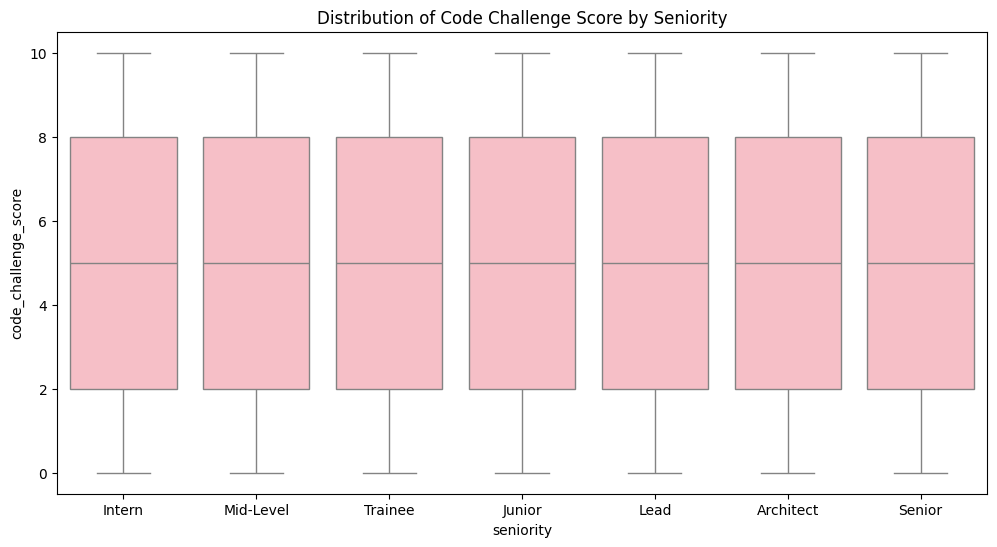

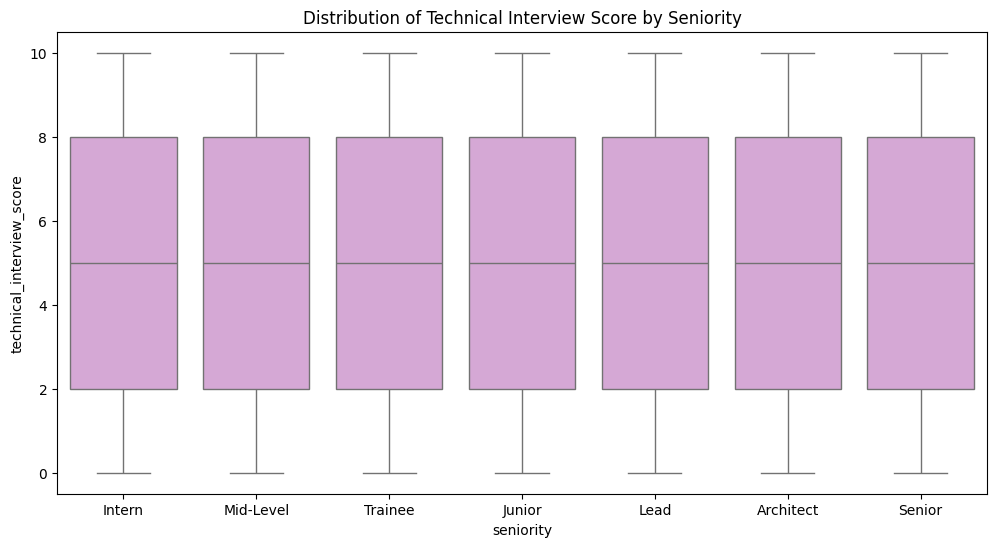

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='seniority', y='code_challenge_score', data=candidates_df, color='lightpink')
plt.title('Distribution of Code Challenge Score by Seniority')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='seniority', y='technical_interview_score', data=candidates_df, color='plum')
plt.title('Distribution of Technical Interview Score by Seniority')
plt.show()